In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(columns=['CustomerId','RowNumber','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
le = LabelEncoder()
# df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df1 = df
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in df1.columns:
    df1[col] = scaler.fit_transform(df1[[col]])

df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [59]:
from sklearn.model_selection import train_test_split
x = df1.drop(columns=['Exited'],axis=1)
y = df1['Exited']
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [60]:
input_size = x_train.shape[1]
input_size

10

In [96]:
model = keras.Sequential([
    Dense(64,activation='tanh',input_shape=(input_size,)),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid')

])

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

c:\Users\samiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7279 - loss: 0.5631
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8007 - loss: 0.4795
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8047 - loss: 0.4543
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.8202 - loss: 0.4488
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.8276 - loss: 0.4298
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8309 - loss: 0.4317
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8400 - loss: 0.4072
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8372 - loss: 0.3989
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8392 - loss: 0.3938
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8449 - loss: 0.3851
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8503 - loss: 0.3759
Epoch 12/100
250/25

In [98]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8728 - loss: 0.3257


[0.3277045488357544, 0.8684999942779541]

In [99]:
y_pred = model.predict(x_test)
y_pred1 = [1 if i[0] >= 0.5 else 0 for i in y_pred]
y_pred1[0]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


0

In [100]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1607
         1.0       0.75      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Text(95.72222222222221, 0.5, 'Truth')

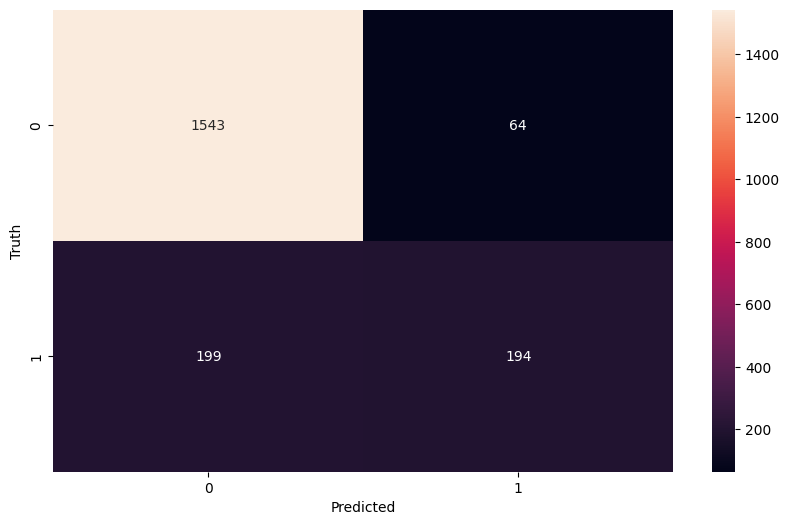

In [101]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')